In [1]:
from numpy import array
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import copy
from sklearn import datasets, svm, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors.kde import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn import mixture
from matplotlib import pyplot as plt

In [2]:
df = datasets.load_digits()

In [3]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [4]:
# data = StandardScaler().fit_transform(data)

In [5]:
sklearn_pca = PCA(n_components=15,whiten=False)
Y_sklearn = sklearn_pca.fit_transform(data)
Y_sklearn

array([[ -1.25948034,  21.27487177,  -9.46305761, ...,   0.90353322,
         -3.35205317,   5.9022158 ],
       [  7.95761259, -20.76870384,   4.43951401, ...,  -2.5777887 ,
         -6.51940588,  -2.33689233],
       [  6.99193799,  -9.95597621,   2.95852668, ...,   0.15188428,
          6.84484417,  -1.77261899],
       ...,
       [ 10.80126639,  -6.96026772,   5.59955973, ...,   3.55268359,
          1.30476768,   2.67486285],
       [ -4.87208576,  12.42396482, -10.17087218, ...,  -9.43767718,
         -1.23754667,  10.70624593],
       [ -0.34437631,   6.36555828,  10.77369337, ...,   4.63986424,
          7.11048462,   0.7549613 ]])

In [6]:
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params, cv=5)
grid.fit(Y_sklearn)

/home/vatsal/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bandwidth': array([ 0.1    ,  0.12743,  0.16238,  0.20691,  0.26367,  0.33598,
        0.42813,  0.54556,  0.69519,  0.88587,  1.12884,  1.43845,
        1.83298,  2.33572,  2.97635,  3.79269,  4.83293,  6.15848,
        7.8476 , 10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [7]:
bd = grid.best_estimator_
new_data = bd.sample(48, random_state=0)
print(new_data.shape)
new_data = sklearn_pca.inverse_transform(new_data)
print(new_data.shape)
new_data = new_data.reshape((4, 12, -1))
real_data = df.data[:48].reshape((4, 12, -1))
new_data.shape

(48, 15)
(48, 64)


(4, 12, 64)

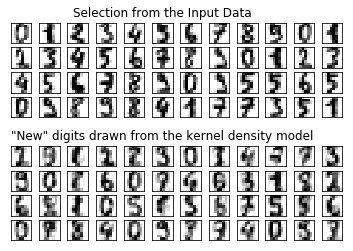

In [8]:
fig, ax = plt.subplots(9, 12, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(12):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the Input Data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

In [18]:
digits = datasets.load_digits()
digits.data.shape

(1797, 64)

In [19]:
pca = PCA(n_components=0.99,whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

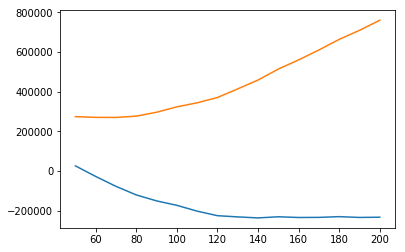

In [20]:
n_components = np.arange(50, 210, 10)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
bics = [model.fit(data).bic(data) for model in models]
plt.plot(n_components, aics ,label = 'AIC')
plt.plot(n_components, bics ,label = 'BIC')

In [21]:
gmm = mixture.GaussianMixture(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [23]:
data_new,_ = gmm.sample(48)
data_new.shape

(48, 41)

In [24]:
data_new = data_new.reshape((4, 12, -1))
data.shape

(1797, 41)

In [25]:
digits_new = pca.inverse_transform(data_new)
# plot_digits(digits_new)
digits_new.shape

(4, 12, 64)

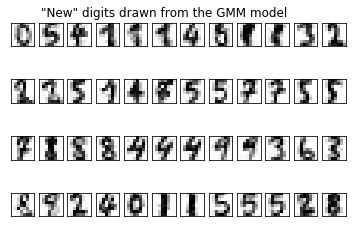

In [27]:
fig, ax = plt.subplots(4, 12, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(12):
    for i in range(4):
        im = ax[i, j].imshow(digits_new[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        
        
ax[0, 5].set_title('"New" digits drawn from the GMM model')

plt.show()